# Noise


In [1]:
import random as rd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

## Simple 1D noise - Value noise

The idea is to create some values at regular intervals on a ruler (1D) and interpolate them using linear interpolation.


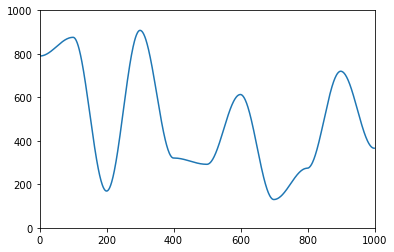

In [2]:
kMaxVertices = 256
kMaxVerticesMask = kMaxVertices - 1
numSamples = 1000
numRange = 1000
numSteps = 1000

frequency = 1
amplitude = 1
offset = 1

# the initial array with random numbers
r = rd.sample(range(0,numSamples), kMaxVertices)

# linear interpolation function
def lerp(lo, hi, t): 
    return lo*(1-t) + hi*t

def cosineSmoothFunc(t):
    return (1 - np.cos(t * np.pi)) * 0.5

# smooth the noise - not looking like saw-toothed curve
def smoothNoise(a, b, t, smoothFunction):
    # t >= 0 && t <= 1
    # cos(x) -> [-1, 1] for x in [0, Pi] 
    tRemap = smoothFunction(t);
    return lerp(a, b, tRemap)   
    
# finding the value closes to the given x
def eval(x):
    xi = int(x)
    t = x - xi
    #xMin = xi % kMaxVertices
    #xMax = xMin+1 if xMin != kMaxVertices-1 else 0
     
    xMin = xi & kMaxVerticesMask
    xMax = (xMin + 1) & kMaxVerticesMask
    
    return smoothNoise(r[xMin], r[xMax],t, cosineSmoothFunc)

def getx(x):
    return (x/(numSteps-1))*10

x = range(0, numSteps)
y = [eval(getx(xi) * frequency + offset) * amplitude for xi in x]

#plt.plot(x, y)
#plt.show()

fig, ax = plt.subplots()
ax.axis([0,numSteps,0,numRange])
l, = ax.plot([],[])

def animate(i):
    _y = [eval(getx(xi) + i) for xi in x]
    l.set_data(x, _y)

anim = animation.FuncAnimation(fig, animate, frames=100)

#display.HTML(anim.to_jshtml())
#display.HTML(anim.to_html5_video())